# Аналитика интернет-магазина

Задачи:

- приоритизировать гипотезы, 
- запустить A/B-тест,
- проанализировать результаты.

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [369]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Приоритизация гипотез

In [370]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [371]:
display(hypothesis.head(5))
display(hypothesis.tail(5))
display(hypothesis.sample(5))
display(hypothesis.info())
display(hypothesis.describe())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Hypothesis,Reach,Impact,Confidence,Efforts
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Hypothesis,Reach,Impact,Confidence,Efforts
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [372]:
hypothesis.columns = hypothesis.columns.str.lower()

### Расчёт ICE и RICE

In [373]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [374]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [375]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [376]:
hypothesis.sort_values(by='rice', ascending=False)[['hypothesis', 'rice']]

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритетные гипотезы по RICE: 7, 2, 0, 6, 8.

In [377]:
hypothesis['ice'] = hypothesis['ice'].round()
hypothesis.sort_values(by='ice', ascending=False)[['hypothesis', 'ice']]

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [378]:
cm = sns.light_palette("purple", as_cmap=True)
hypothesis.sort_values(by='rice', ascending=False).head(5)[['hypothesis', 'rice', 'ice']].style.background_gradient(cmap=cm)

,hypothesis,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16


Приоритетные гипотезы по ICE: 8, 0, 7, 6, 2.

И по RICE, и по ICE пять первых приоритетных гипотез одни и те же: 0, 2, 6, 7, 8. Изменяется их место в топе, потому что RICE учитывает количество пользователей, на которых повлияют изменения.

Гипотеза 8 по RICE на последнем месте, а по ICE на первом, гипотеза 7 по RICE на первом месте, а по ICE на третьем, гипотеза 2 по ICE на последнем месте, а по RICE на втором. Гипотеза шесть на четвёртом месте и по RICE, и по ICE.

Приоритетные гипотезы по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
- Запустить акцию, дающую скидку на товар в день рождения.
    
Приоритетные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.	

## Анализ A/B-теста

### Предобработка данных

In [379]:
orders = pd.read_csv('/datasets/orders.csv')

In [380]:
display(orders.head(5))
display(orders.tail(5))
display(orders.sample(5))
display(orders.info())
display(orders.describe())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


,transactionId,visitorId,date,revenue,group
39,1950404403,114507418,2019-08-15,610,B
823,2971973105,199603092,2019-08-27,2790,A
922,4223601037,1611907877,2019-08-10,2250,B
976,260086319,2156256996,2019-08-22,2907,B
587,1482923642,666694713,2019-08-20,1290,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [381]:
orders.duplicated().sum()

0

In [382]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

Пропусков и дубликатов в таблице orders нет. Тип данных в столбце ['date'] изменён на datetime.

In [386]:
Abuyers = set(orders[orders['group'] == 'A']['visitorId'].unique())
Bbuyers = set(orders[orders['group'] == 'B']['visitorId'].unique())
ABbuyers = Abuyers & Bbuyers
len(ABbuyers)

58

58 пользователей попали в обе группы.

In [388]:
orders = orders[np.logical_not(orders['visitorId'].isin(ABbuyers))]

In [389]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [390]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [391]:
display(visitors.head(5))
display(visitors.tail(5))
display(visitors.sample(5))
display(visitors.info())
display(visitors.describe())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


,date,group,visitors
28,2019-08-29,A,577
54,2019-08-24,B,378
44,2019-08-14,B,746
10,2019-08-11,A,718
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [392]:
visitors.duplicated().sum()

0

In [393]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Пропусков и дубликатов в таблице orders нет. Тип данных в столбце ['date'] изменён на datetime.

### Расчёт и анализ кумулятивных показателей

In [394]:
datesGroups = orders[['date','group']].drop_duplicates()

In [395]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [396]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [397]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [398]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

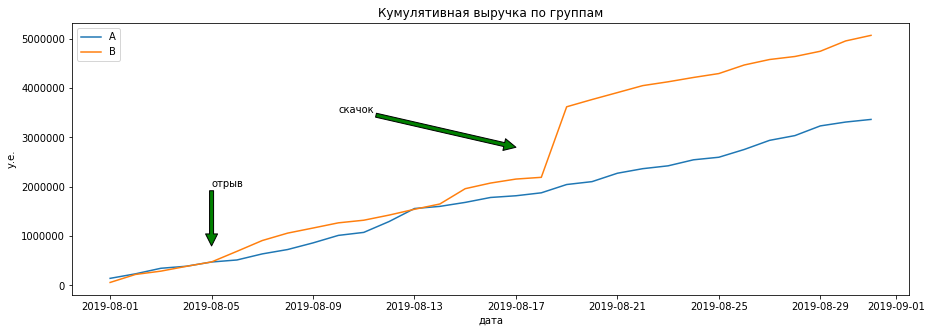

In [399]:
plt.figure(figsize=(15, 5))
plt.title('Кумулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.xlabel('дата')
plt.ylabel('у.е.')
plt.legend();
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000), arrowprops=dict(facecolor='g'));
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000), arrowprops=dict(facecolor='g'));

Выручка по обеим группе В больше, чем выручка по группе А.

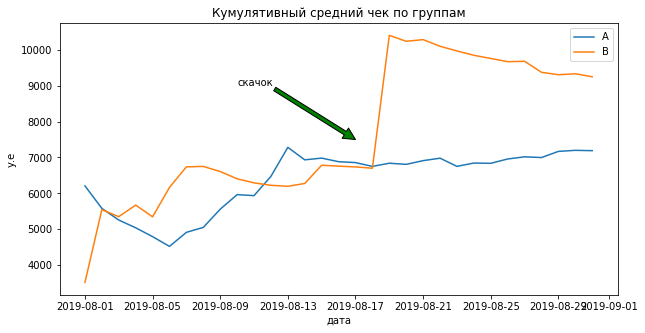

In [400]:
plt.figure(figsize=(10, 5))
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B');
plt.xlabel('дата')
plt.ylabel('у.е')
plt.legend();
plt.annotate('скачок', xy=('2019-08-17', 7500), xytext=('2019-08-10', 9000), arrowprops=dict(facecolor='g'));

Средний чек группы В больше, чем средний чек группы А. 18 августа наблюдается резкое увеличение среднего чека группы В, что может быть связано с единичными очень дорогими покупками.

In [401]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])

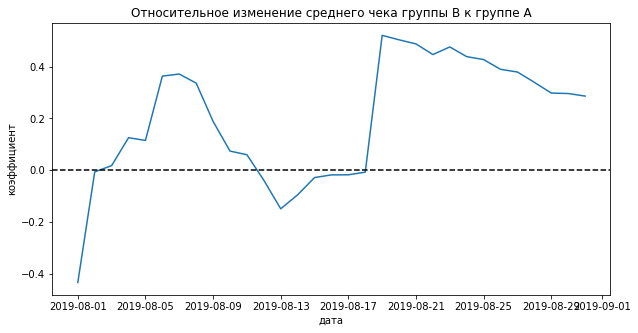

In [402]:
plt.figure(figsize=(10, 5))
plt.title('Относительное изменение среднего чека группы В к группе А')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1);
plt.xlabel('дата')
plt.ylabel('коэффициент')
plt.axhline(y=0, linestyle='--', color='black');

Средний чек группы В больше, чем средний чек группы А. Наблюдается несколько пиков, значит, в данных есть большие заказы.

In [403]:
cumulativeData['conversion'] = cumulativeData['buyers'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

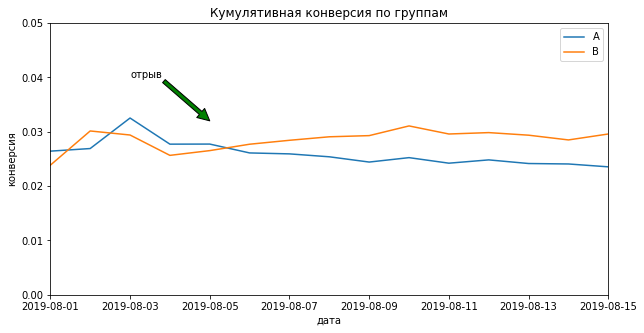

In [404]:
plt.figure(figsize=(10, 5))
plt.title('Кумулятивная конверсия по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.axis(["2019-08-01", '2019-08-15', 0, 0.05]);
plt.annotate('отрыв', xy=('2019-08-05', 0.032), xytext=('2019-08-03', 0.04), arrowprops=dict(facecolor='g'));

Коммулятивная конверсия в группе В больше, чем в группе А.

In [405]:
mergedCumulativeConversion = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on='date', suffixes=['A', 'B'])

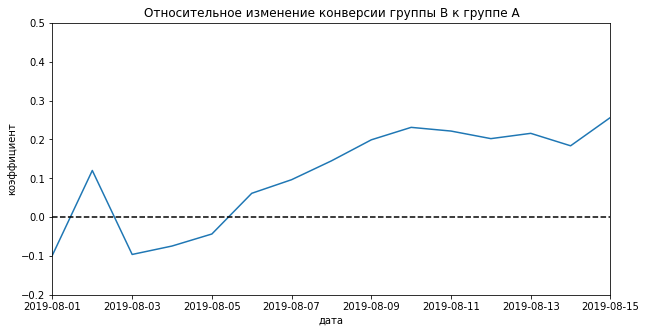

In [406]:
plt.figure(figsize=(10, 5))
plt.title('Относительное изменение конверсии группы В к группе А')
plt.plot(mergedCumulativeConversion['date'], mergedCumulativeConversion['conversionB'] / mergedCumulativeConversion['conversionA'] - 1);
plt.axhline(y=0, linestyle='--', color='black');
plt.xlabel('дата')
plt.ylabel('коэффициент')
plt.axis(["2019-08-01", '2019-08-15', -0.2, 0.5]); 

Конверсия группы В больше, чем конверсия группы А.

### Поиск аномалий

In [407]:
cumulativeData['orders_per_buyers'] = cumulativeData['orders'] / cumulativeData['buyers']

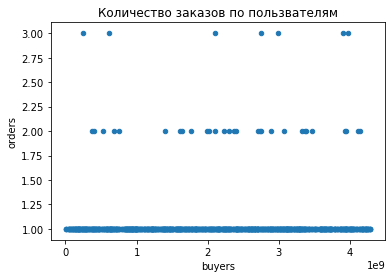

In [409]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['buyers', 'orders']
ordersByUsers.plot(kind='scatter', x='buyers', y='orders', title=('Количество заказов по пользвателям'));

In [411]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

5% пользователей сделали больше 2 заказов, а 1% - больше 4.

In [412]:
ordersByUsers['orders'].sort_values()

0      1
636    1
637    1
638    1
639    1
      ..
138    3
908    3
632    3
890    3
55     3
Name: orders, Length: 973, dtype: int64

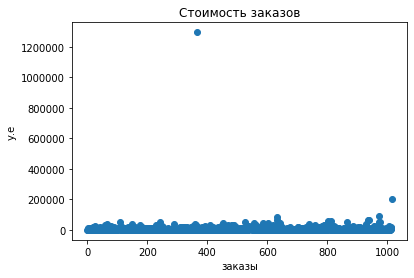

In [415]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue']);
plt.xlabel('заказы');
plt.ylabel('у.е');

In [416]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

5% заказов дороже 27 460, а 1% - дороже 55 936.

### Анализ результатов A/B-теста

#### По "сырым" данным

In [417]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsCumulativeA = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsCumulativeA.columns = ['date', 'visitorsCumulativeA']
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACumulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by='date')
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsCumulativeB = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsCumulativeB.columns = ['date', 'visitorsCumulativeB']
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCumulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by='date')
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']

In [418]:
data = ordersADaily.merge(ordersBDaily, on='date', how='left').merge(ordersACumulative, on='date', how='left').merge(ordersBCumulative, on='date', how='left').merge(visitorsADaily, on='date', how='left').merge(visitorsBDaily, on='date', how='left').merge(visitorsCumulativeA, on='date', how='left').merge(visitorsCumulativeB, on='date', how='left')
data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCumulativeA,revenueCumulativeA,ordersCumulativeB,revenueCumulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCumulativeA,visitorsCumulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


In [419]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

In [420]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Нулевая гипотеза - различие между конверсиями групп А и В статистически недостоверно.
    
Альтернативная гипотеза - различие между конверсиями статистически достоверно.

In [421]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


p-value (0,011) меньше 0,05, конверсия групп А и В по "сырым данным" различается. Относительный прирост конверсии группы В относительно группы А - 16%.

Нулевая гипотеза - различие между средними чеками групп А и В статистически недостоверно.
    
Альтернативная гипотеза - различие между средними чеками статистически достоверно.

In [422]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group'] == 'B']['revenue'], orders[orders['group'] == 'A']['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.829
0.287


p-value (0,829) больше 0,05, статистически значимой разницы между средними чеками группы А и В нет.
Средний чек группы В на 29% больше, чем средний чек группы А.

#### По очищенным данным

In [423]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1.1]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
display(abnormalUsers.head(5))
display(abnormalUsers.shape)

1099    148427295
33      249864742
51      406208401
67      522292794
58      611059232
dtype: int64

(32,)

In [424]:
orders['visitorId'].nunique()

973

51 пользователь - это 5% от 996.

In [425]:
sampleAFiltred = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltred = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Нулевая гипотеза - различие между конверсиями групп А и В статистически недостоверно.
    
Альтернативная гипотеза - различие между конверсиями статистически достоверно.

In [426]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltred, sampleBFiltred, alternative = 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltred.mean() / sampleAFiltred.mean() - 1))

0.028
0.119


p-value увеличился с 0,011 до 0,028, но всё ещё меньше 0,05, значит различие между конверсиями групп А и В есть.

Разница снизилась с 16 до 12%.

Нулевая гипотеза - различие между средними чеками групп А и В статистически недостоверно.
    
Альтернативная гипотеза - различие между средними чеками статистически достоверно.

In [427]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))
print('{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.777
-0.015


p-value снизился с 0,829 до 0,777, но всё ещё больше 0,05, значит статистически значимого различия между средними чеками групп А и В нет.

По "сырым" данным средний чек группы В больше, чем средний чек группы А на 29%, по очищенным данным - меньше на 1,5%.

Тест нужно остановить, группа В лучше группы А (разница конверсий достоверна как по "сырым", так и по очищенным данным; по графику конверсия группы В больше конверсии группы А и растёт; относительный прирост конверсии группы В к группе А положительный и растёт).

## Общий вывод

В данных нет пропусков и дубликатов. 35 пользователей из 1031 попали в обе групппы.

И по RICE, и по ICE пять первых приоритетных гипотез одни и те же: 0, 2, 6, 7, 8. Изменяется их место в топе, потому что RICE учитывает количество пользователей, на которых повлияют изменения. Порядок приоритета по RICE: 7, 2, 0, 6, 8.

Приоритетные гипотезы по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
- Запустить акцию, дающую скидку на товар в день рождения.
    
Приоритетные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

А/В-тест нужно остановить, группа В лучше группы А (разница конверсий достоверна как по "сырым" (p-value - 0,011), так и по очищенным данным (p-value - 0,028); по графику конверсия группы В больше конверсии группы А и растёт; относительный прирост конверсии группы В к группе А положительный и растёт).

Если конверсия в группе В выше, чем в группе А, а средний чек не различается, значит пользователи группы В делают больше дешёвых заказов. Возможно, в будущем они будут делать и более дорогие заказы, потому что у них есть опыт взаимодействия с магазином. Возможно, было бы проще предположить, что даст победа группы В, если бы было известно какую гипотезу тестировали.